# Specifications

* Model : VGG16
* Split Layer : block3_pool
* Imagenet Class : 235
* Number of Images in test : 88

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [42]:
lossList = np.arange(0.2, 1.2, 0.2)
lossList

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [2]:
pureDir = 'noquantError'
pureList = os.listdir(pureDir)
pureList = [os.path.join(pureDir, i) for i in pureList]
pureList

['noquantError\\0Loss_1Packet_block3_pool.npy',
 'noquantError\\0Loss_2Packet_block3_pool.npy',
 'noquantError\\0Loss_3Packet_block3_pool.npy',
 'noquantError\\0Loss_4Packet_block3_pool.npy',
 'noquantError\\0Loss_5Packet_block3_pool.npy',
 'noquantError\\1Loss_1Packet_block3_pool.npy',
 'noquantError\\1Loss_2Packet_block3_pool.npy',
 'noquantError\\1Loss_3Packet_block3_pool.npy',
 'noquantError\\1Loss_4Packet_block3_pool.npy',
 'noquantError\\1Loss_5Packet_block3_pool.npy',
 'noquantError\\2Loss_1Packet_block3_pool.npy',
 'noquantError\\2Loss_2Packet_block3_pool.npy',
 'noquantError\\2Loss_3Packet_block3_pool.npy',
 'noquantError\\2Loss_4Packet_block3_pool.npy',
 'noquantError\\2Loss_5Packet_block3_pool.npy',
 'noquantError\\3Loss_1Packet_block3_pool.npy',
 'noquantError\\3Loss_2Packet_block3_pool.npy',
 'noquantError\\3Loss_3Packet_block3_pool.npy',
 'noquantError\\3Loss_4Packet_block3_pool.npy',
 'noquantError\\3Loss_5Packet_block3_pool.npy',
 'noquantError\\4Loss_1Packet_block3_poo

## Test1: Compare the effect of quantization

In [3]:
quantDir = 'quantizationOnly'
dirList = os.listdir(quantDir)
len(dirList)

100

In [4]:
t = dirList
t = [i.split('_') for i in t]
t.sort(key=lambda x:x[1])
t = ['_'.join(i) for i in t]

In [5]:
t = [os.path.join(quantDir, i) for i in t]
len(t)

100

In [6]:
#0: 10 bit quant
#1: 4 bit quant
#2: 6 bit quant
#3: 8 bit quant
l = 0
quantTest = t[l*25:(l+1)*25]
quantTest

['quantizationOnly\\0Loss_10Quantization_1Packet_block3_pool.npy',
 'quantizationOnly\\0Loss_10Quantization_2Packet_block3_pool.npy',
 'quantizationOnly\\0Loss_10Quantization_3Packet_block3_pool.npy',
 'quantizationOnly\\0Loss_10Quantization_4Packet_block3_pool.npy',
 'quantizationOnly\\0Loss_10Quantization_5Packet_block3_pool.npy',
 'quantizationOnly\\1Loss_10Quantization_1Packet_block3_pool.npy',
 'quantizationOnly\\1Loss_10Quantization_2Packet_block3_pool.npy',
 'quantizationOnly\\1Loss_10Quantization_3Packet_block3_pool.npy',
 'quantizationOnly\\1Loss_10Quantization_4Packet_block3_pool.npy',
 'quantizationOnly\\1Loss_10Quantization_5Packet_block3_pool.npy',
 'quantizationOnly\\2Loss_10Quantization_1Packet_block3_pool.npy',
 'quantizationOnly\\2Loss_10Quantization_2Packet_block3_pool.npy',
 'quantizationOnly\\2Loss_10Quantization_3Packet_block3_pool.npy',
 'quantizationOnly\\2Loss_10Quantization_4Packet_block3_pool.npy',
 'quantizationOnly\\2Loss_10Quantization_5Packet_block3_pool.n

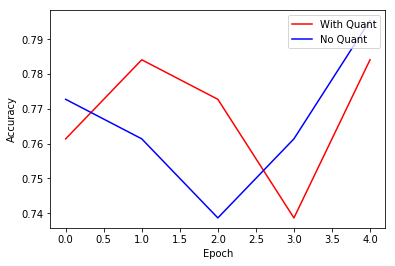

In [33]:
aQuant = np.load(quantTest[-6])
bQuant = np.load(pureList[-6])
plt.plot(aQuant[:, 0], aQuant[:, 1], 'r', label='With Quant')
plt.plot(bQuant[:, 0], bQuant[:, 1], 'b', label='No Quant')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

In [34]:
aQuant

array([[0.        , 0.76136364],
       [1.        , 0.78409091],
       [2.        , 0.77272727],
       [3.        , 0.73863636],
       [4.        , 0.78409091]])

In [35]:
bQuant

array([[0.        , 0.77272727],
       [1.        , 0.76136364],
       [2.        , 0.73863636],
       [3.        , 0.76136364],
       [4.        , 0.79545455]])

## Effect of bilinear interpolation for error concealment

In [10]:
errorDir  = 'errorConcealOnly'
errorList = os.listdir(errorDir)
errorList = [os.path.join(errorDir, i) for i in errorList]
errorList

['errorConcealOnly\\0Loss_1Packet_block3_pool.npy',
 'errorConcealOnly\\0Loss_2Packet_block3_pool.npy',
 'errorConcealOnly\\0Loss_3Packet_block3_pool.npy',
 'errorConcealOnly\\0Loss_4Packet_block3_pool.npy',
 'errorConcealOnly\\0Loss_5Packet_block3_pool.npy',
 'errorConcealOnly\\1Loss_1Packet_block3_pool.npy',
 'errorConcealOnly\\1Loss_2Packet_block3_pool.npy',
 'errorConcealOnly\\1Loss_3Packet_block3_pool.npy',
 'errorConcealOnly\\1Loss_4Packet_block3_pool.npy',
 'errorConcealOnly\\1Loss_5Packet_block3_pool.npy',
 'errorConcealOnly\\2Loss_1Packet_block3_pool.npy',
 'errorConcealOnly\\2Loss_2Packet_block3_pool.npy',
 'errorConcealOnly\\2Loss_3Packet_block3_pool.npy',
 'errorConcealOnly\\2Loss_4Packet_block3_pool.npy',
 'errorConcealOnly\\2Loss_5Packet_block3_pool.npy',
 'errorConcealOnly\\3Loss_1Packet_block3_pool.npy',
 'errorConcealOnly\\3Loss_2Packet_block3_pool.npy',
 'errorConcealOnly\\3Loss_3Packet_block3_pool.npy',
 'errorConcealOnly\\3Loss_4Packet_block3_pool.npy',
 'errorConce

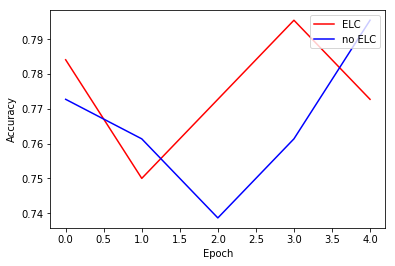

In [11]:
#the index for the list denotes the loss and packet configuration
aError = np.load(errorList[-6])
bError = np.load(pureList[-6])
plt.plot(aError[:, 0], aError[:, 1], 'r', label='ELC')
plt.plot(bError[:, 0], bError[:, 1], 'b', label='no ELC')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

In [12]:
aError

array([[0.        , 0.78409091],
       [1.        , 0.75      ],
       [2.        , 0.77272727],
       [3.        , 0.79545455],
       [4.        , 0.77272727]])

In [13]:
bError

array([[0.        , 0.77272727],
       [1.        , 0.76136364],
       [2.        , 0.73863636],
       [3.        , 0.76136364],
       [4.        , 0.79545455]])

## Error Concealment and Quantization included:

In [14]:
errorQuantDir = 'quantAndError'
errorQuantList = os.listdir(errorQuantDir)
errorQuantList = [os.path.join(errorQuantDir, i) for i in errorQuantList]
errorQuantList

['quantAndError\\0Loss_10Quantization_errorConceal_1Packet_block3_pool.npy',
 'quantAndError\\0Loss_10Quantization_errorConceal_2Packet_block3_pool.npy',
 'quantAndError\\0Loss_10Quantization_errorConceal_3Packet_block3_pool.npy',
 'quantAndError\\0Loss_10Quantization_errorConceal_4Packet_block3_pool.npy',
 'quantAndError\\0Loss_10Quantization_errorConceal_5Packet_block3_pool.npy',
 'quantAndError\\1Loss_10Quantization_errorConceal_1Packet_block3_pool.npy',
 'quantAndError\\1Loss_10Quantization_errorConceal_2Packet_block3_pool.npy',
 'quantAndError\\1Loss_10Quantization_errorConceal_3Packet_block3_pool.npy',
 'quantAndError\\1Loss_10Quantization_errorConceal_4Packet_block3_pool.npy',
 'quantAndError\\1Loss_10Quantization_errorConceal_5Packet_block3_pool.npy',
 'quantAndError\\2Loss_10Quantization_errorConceal_1Packet_block3_pool.npy',
 'quantAndError\\2Loss_10Quantization_errorConceal_2Packet_block3_pool.npy',
 'quantAndError\\2Loss_10Quantization_errorConceal_3Packet_block3_pool.npy',

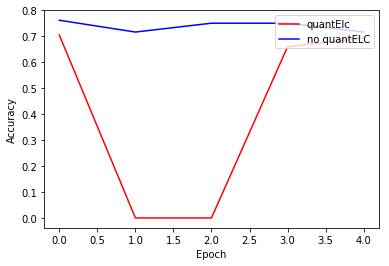

In [43]:
aErrorQuant = np.load(errorQuantList[12])
bErrorQuant = np.load(pureList[12])
plt.plot(aErrorQuant[:, 0], aErrorQuant[:, 1], 'r', label='quantElc')
plt.plot(bErrorQuant[:, 0], bErrorQuant[:, 1], 'b', label='no quantELC')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

In [44]:
aErrorQuant

array([[0.        , 0.70454545],
       [1.        , 0.        ],
       [2.        , 0.        ],
       [3.        , 0.65909091],
       [4.        , 0.69318182]])

In [45]:
bErrorQuant

array([[0.        , 0.76136364],
       [1.        , 0.71590909],
       [2.        , 0.75      ],
       [3.        , 0.75      ],
       [4.        , 0.71590909]])